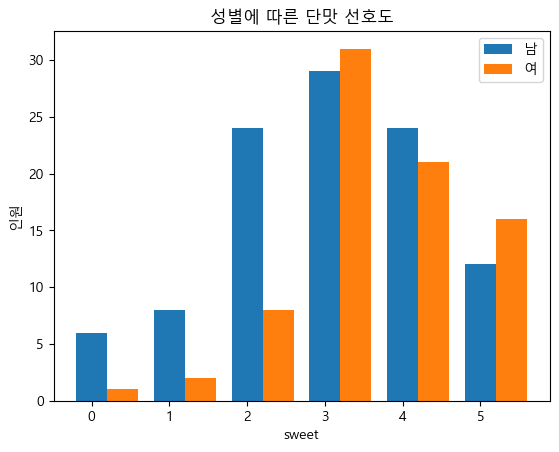

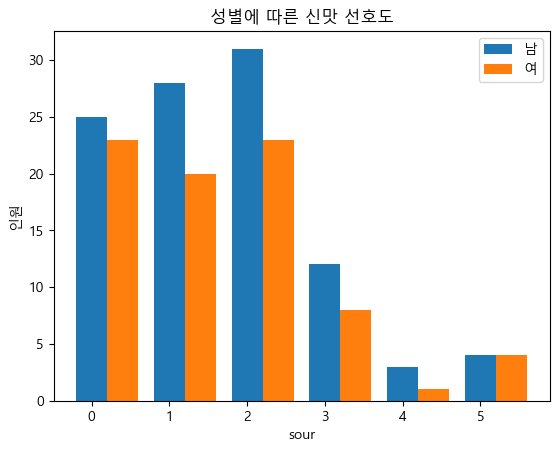

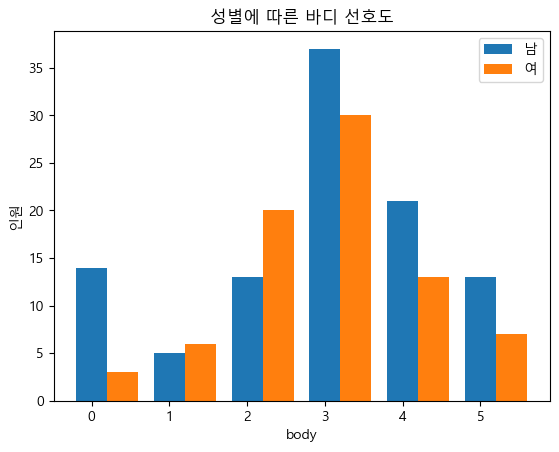

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
df = pd.read_csv("설문조사.csv")

# 성별, 연령 값 저장
gender = df["성별"]
age = df["연령"]

# "성별"이 B열, "맛"이 D, E, F열인 데이터 추출
gender_sweet_data = df.iloc[:, [1, 3]]
gender_sour_data = df.iloc[:, [1, 4]]
gender_body_data = df.iloc[:, [1, 5]]

def gender_plot_graph(data, title, taste):
    # 남, 여로 데이터 분리
    male_data = data[data['성별'] == '남']
    female_data = data[data['성별'] == '여']

    male_data_count = male_data[taste].value_counts().sort_index()
    female_data_count = female_data[taste].value_counts().sort_index()

    # 그래프 그리기
    bar_width = 0.4
    bar_positions_male = male_data_count.index
    bar_positions_female = [pos + bar_width for pos in bar_positions_male]

    plt.bar(bar_positions_male, male_data_count, width=bar_width, label='남')
    plt.bar(bar_positions_female, female_data_count, width=bar_width, label='여')

    plt.xlabel(taste)
    plt.ylabel('인원')
    plt.title(title)
    plt.legend()
    plt.show()


gender_plot_graph(gender_sweet_data, '성별에 따른 단맛 선호도', 'sweet')
gender_plot_graph(gender_sour_data, '성별에 따른 신맛 선호도', 'sour')
gender_plot_graph(gender_body_data, '성별에 따른 바디 선호도', 'body')

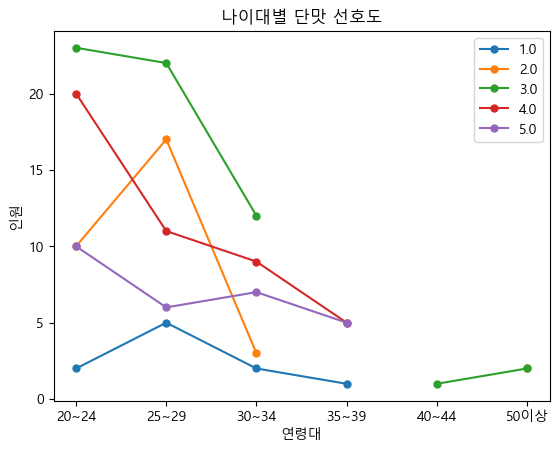

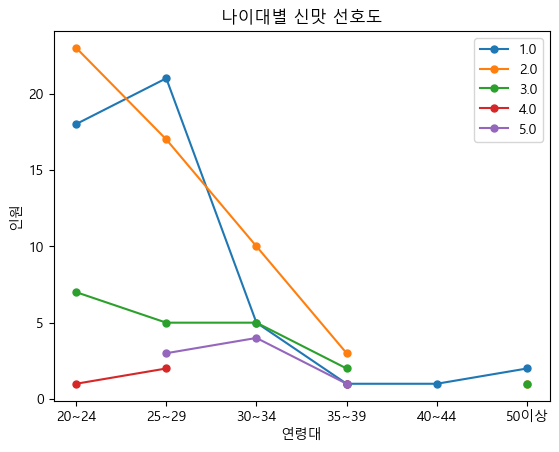

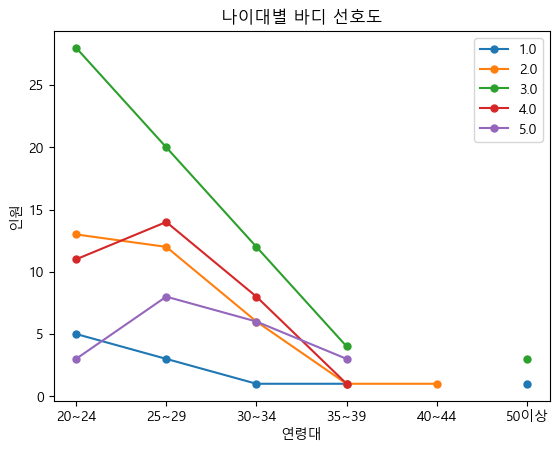

In [9]:
# 연령대 구간 설정
age_bins = [20, 25, 30, 35, 40, 45, 50, float('inf')]
age_labels = ['20~24', '25~29', '30~34', '35~39', '40~44', '50이상']


# 연령대에 따른 맛 점수 데이터 추출
# 각 연령대별로 단맛, 신맛, 바디 맛의 선호도 데이터를 구합니다.
age_sweet_data = df.groupby(['연령', 'sweet']).size().reset_index(name='인원')
age_sour_data = df.groupby(['연령', 'sour']).size().reset_index(name='인원')
age_body_data = df.groupby(['연령', 'body']).size().reset_index(name='인원')

def age_plot_graph(data, taste, title):
    # 0점인 데이터는 제외하고 그래프를 그리기 위해 0이 아닌 데이터를 추출합니다.
    data = data[data[taste] != 0]

    # 연령대를 인덱스로 하고, 맛을 열로 하는 DataFrame으로 재구성합니다.
    age_taste_pivot = data.pivot(index="연령", columns=taste, values='인원')

    # 연령대 그룹 정보와 맛의 종류 개수를 저장합니다.
    age_groups = age_taste_pivot.index
    num_taste = len(age_taste_pivot.columns)

    # 그래프를 생성하기 위한 subplot을 설정합니다.
    fig, ax = plt.subplots()

    # 각 맛의 선호도에 대한 그래프를 그립니다.
    for i, taste in enumerate(age_taste_pivot.columns):
        ax.plot(range(len(age_groups)), age_taste_pivot[taste], marker='o', linestyle='solid',
                markersize=5, label=taste)

    # x축 범주 값 설정
    ax.set_xticks(range(len(age_groups)))
    ax.set_xticklabels(age_labels)

    # x축 레이블과 y축 레이블, 그리고 그래프의 제목과 범례를 설정합니다.
    ax.set_xlabel('연령대')
    ax.set_ylabel('인원')
    ax.set_title(title)
    ax.set_xticks(range(len(age_groups)))
    ax.legend()
    plt.show()

# 각 맛에 대한 연령대별 선호도 막대 그래프를 그립니다.
age_plot_graph(age_sweet_data, 'sweet', '나이대별 단맛 선호도')
age_plot_graph(age_sour_data, 'sour', '나이대별 신맛 선호도')
age_plot_graph(age_body_data, 'body', '나이대별 바디 선호도')

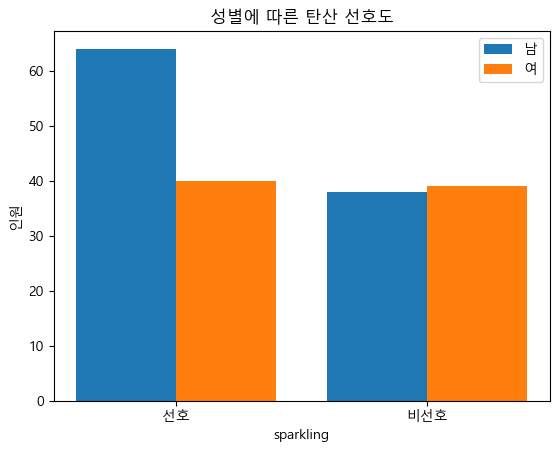

In [10]:
gender_sparkling_data = df.iloc[:, [1,7]]

def gender_plot_graph(data, title, taste):
    # 남, 여로 데이터 분리
    male_data = data[data['성별'] == '남']
    female_data = data[data['성별'] == '여']

    male_data_count = male_data[taste].value_counts().sort_index()
    female_data_count = female_data[taste].value_counts().sort_index()

    # 그래프 그리기
    bar_width = 0.4
    bar_positions_male = male_data_count.index
    bar_positions_female = [pos + bar_width for pos in bar_positions_male]

    plt.bar(bar_positions_male, male_data_count, width=bar_width, label='남')
    plt.bar(bar_positions_female, female_data_count, width=bar_width, label='여')
    
    plt.xticks([pos + bar_width / 2 for pos in bar_positions_male], ['선호', '비선호'])
    
    #plt.xlim(0, 2)
    plt.xlabel(taste)
    plt.ylabel('인원')
    plt.title(title)
    plt.legend()
    plt.show()
    
gender_plot_graph(gender_sparkling_data, '성별에 따른 탄산 선호도', 'sparkling')

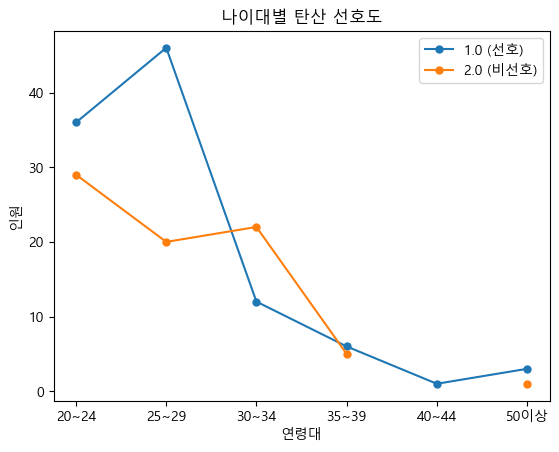

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령대 구간 설정
age_bins = [20, 25, 30, 35, 40, 50, float('inf')]
age_labels = ['20~24', '25~29', '30~34', '35~39', '40~44', '50이상']


# 연령대에 따른 탄산 선호도 데이터 추출
age_sparkling_data = df.groupby(['연령', 'sparkling']).size().reset_index(name='인원')

def age_plot_graph(data, taste, title):
    # Filtering the data based on the taste (e.g., 'sparkling', 'sweet', 'sour', 'body')
    data = data[data[taste].isin([1, 2])]

    # 연령대를 인덱스로 하고, 맛을 열로 하는 DataFrame으로 재구성
    age_taste_pivot = data.pivot(index="연령", columns=taste, values='인원')

    age_groups = age_taste_pivot.index
    num_taste = len(age_taste_pivot.columns)

    fig, ax = plt.subplots()

    for i, taste_val in enumerate(age_taste_pivot.columns):
        ax.plot(range(len(age_groups)), age_taste_pivot[taste_val], marker='o', linestyle='solid',
                markersize=5, label=f'{taste_val} (선호)' if taste_val == 1 else f'{taste_val} (비선호)')

    # Fix the xticks and labels
    ax.set_xticks(range(len(age_groups)))
    ax.set_xticklabels(age_labels)

    ax.set_xlabel('연령대')
    ax.set_ylabel('인원')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Now, you can call the function for different taste categories
age_plot_graph(age_sparkling_data, 'sparkling', '나이대별 탄산 선호도')
